In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains food prices at different restaurants alongwith other associated features. The dataset can be used to analyse what factors affect food prices at restaurants and we can also prepare a machine learning model to predict the food prices for different restaurants.

In [92]:
training = pd.read_excel("restaurant_Data_Train.xlsx")
testing = pd.read_excel("restaurant_Data_Test.xlsx")
training.shape

(12690, 9)

In [93]:
testing.shape

(4231, 8)

In [94]:
training.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [95]:
testing.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


Let's put and identifier column in training & testing set & concatenate them for uniform preprocessing before fitting machine learning algorithms

In [96]:
training["source"] = "train"
testing["source"] = "test"

In [97]:
df = pd.concat([training,testing])

In [98]:
df.shape

(16921, 10)

In [99]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [102]:
#Checking for null values in the dataset before feature transformaton
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
source              0
dtype: int64

Let us find the number of duplicated entries in the merged dataset and remove them

In [106]:
df.duplicated().sum()

0

In [107]:
df= df.drop_duplicates()

In [118]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              4
VOTES            1579
COST             4195
source              0
Location            0
dtype: int64

In [119]:
# CITY has 147 null values and locality has 128, let's combine City and locality to get complete location
df['Location']=df['CITY']+' '+df['LOCALITY']

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16747 entries, 0 to 4230
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16747 non-null  object 
 1   RESTAURANT_ID  16747 non-null  int64  
 2   CUISINES       16747 non-null  object 
 3   TIME           16747 non-null  object 
 4   CITY           16747 non-null  object 
 5   LOCALITY       16747 non-null  object 
 6   RATING         16743 non-null  object 
 7   VOTES          15168 non-null  object 
 8   COST           12552 non-null  float64
 9   source         16747 non-null  object 
 10  Location       16747 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.5+ MB


In [121]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              4
VOTES            1579
COST             4195
source              0
Location            0
dtype: int64

Let's drop the rows where the location is null

In [122]:
df.dropna(subset=['Location'],inplace=True)

In [123]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              4
VOTES            1579
COST             4195
source              0
Location            0
dtype: int64

In [124]:
df['Location'].value_counts()

Hyderabad Gachibowli                       214
Bangalore Indiranagar                      183
Kochi Kakkanad                             172
Hyderabad Kukatpally                       170
Hyderabad Madhapur                         167
                                          ... 
Chennai Chettipunyam                         1
Edappally Nh 17                              1
Gurgaon Near Sector 17                       1
Bangalore 5th Phase                          1
Aluva Manjapetty Aluva Perumbavoor Road      1
Name: Location, Length: 1950, dtype: int64

Let's extract a definite set of locations from the location column for the machine learning model

In [125]:
import fuzzywuzzy
from fuzzywuzzy import process
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array

In [126]:
#location should contain one of the following categories or 'Others' as set in the match names function
correct_names=['Bangalore','Thane',
'Hyderabad','Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi', 
'Noida', 
'Gurgaon', 'Ernakulam',
'Faridabad', 'Ghaziabad',
'Secunderabad']

In [127]:
name_match=match_names(df.Location,correct_names)    

print(len(names_array))
df['Location']=names_array

16747


In [128]:
df["Location"].value_counts()

Bangalore       2938
Chennai         2909
Hyderabad       2496
Mumbai          2264
Delhi           1790
Kochi           1776
Gurgaon          537
Secunderabad     402
Noida            318
Others           265
Bandra           244
Andheri          236
Thane            223
Ghaziabad        133
Faridabad        112
Kerala            59
Ernakulam         28
Telangana         17
Name: Location, dtype: int64

The values in the location column have been standardised

In [129]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              4
VOTES            1579
COST             4195
source              0
Location            0
dtype: int64

Let's transform the cuisines column for the machine learning model

In [130]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [131]:
df["CUISINES"]

0                         [Malwani,  Goan,  North Indian]
1                      [Asian,  Modern Indian,  Japanese]
2         [North Indian,  Chinese,  Biryani,  Hyderabadi]
3                                     [Tibetan,  Chinese]
4                                              [Desserts]
                              ...                        
4226                   [North Indian,  Mughlai,  Chinese]
4227    [Biryani,  North Indian,  Sandwich,  Salad,  W...
4228                         [Continental,  North Indian]
4229                                  [Rolls,  Beverages]
4230                                            [Mughlai]
Name: CUISINES, Length: 16747, dtype: object

In [132]:
df['CUISINES'].isna().sum()

0

In [133]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))

In [134]:
df_cuisines

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Egyptian,African,Egyptian,Fish and Chips,Brazilian,South American,Mishti,Falafel,Cantonese,Hawaiian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4227,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4228,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Similarly let's transform the Title column for the model

In [135]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list

In [136]:
df['TITLE']

0            [CASUAL DINING]
1       [CASUAL DINING, BAR]
2            [CASUAL DINING]
3              [QUICK BITES]
4           [DESSERT PARLOR]
                ...         
4226         [CASUAL DINING]
4227                  [None]
4228           [QUICK BITES]
4229           [QUICK BITES]
4230           [QUICK BITES]
Name: TITLE, Length: 16747, dtype: object

In [137]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))

In [138]:
df_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look at entries where the rating value is NaN

In [139]:
df[df['RATING'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
204,[BAKERY],15062,[Bakery],Not Available,Kochi,Marine Drive,NaN,NaN,200.0,train,Kochi
421,[CAFÉ],14127,"[Cafe, Fast Food]",Not Available,Hyderabad,Banjara Hills,NaN,NaN,350.0,train,Hyderabad
2035,[QUICK BITES],2776,"[Kerala, Arabian]",Not Available,Kochi,Kakkanad,NaN,NaN,NaN,test,Kochi
2758,[None],11301,"[Chinese, North Indian, South Indian]",Not Available,Kochi,Tripunithura,NaN,NaN,NaN,test,Kochi


Let's fill the NaN values by grouping the entries as per city and filling the mode

In [140]:
df["RATING"] = df.groupby("CITY").RATING.transform(lambda x : x.fillna(x.mode()[0]))

In [141]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1579
COST             4195
source              0
Location            0
dtype: int64

In [142]:
df['RATING']=df['RATING'].str.extract('(\d+)').astype(float)

Text(0.5, 1.0, 'RATING - Distplot')

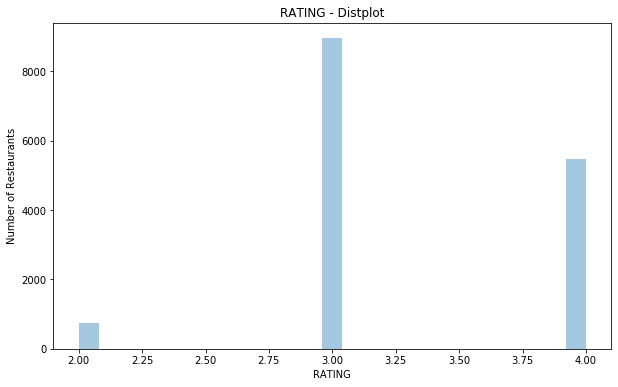

In [143]:
plt.figure(figsize=(10,6))
sns.distplot(df["RATING"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('RATING')
plt.ylabel('Number of Restaurants')
plt.title('RATING - Distplot')

Most of the restarant have an average rating

In [144]:
df['VOTES'].isna().sum()

1579

Let's fill the missing values with O

In [146]:
df.VOTES.fillna('0',inplace=True)
df['VOTES']=df['VOTES'].str.extract('(\d+)').astype(float)

AttributeError: Can only use .str accessor with string values!

Text(0.5, 1.0, 'VOTES - Distplot')

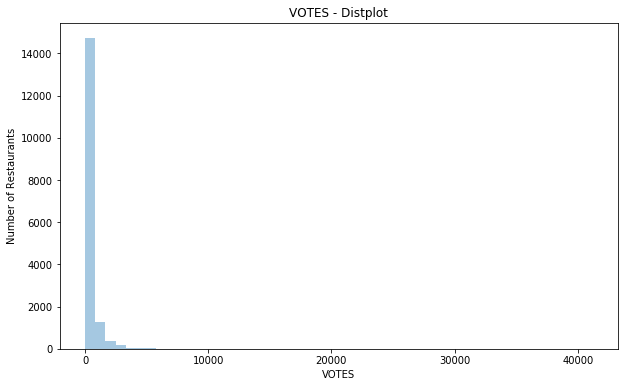

In [147]:
plt.figure(figsize=(10,6))
sns.distplot(df["VOTES"],kde=False)
#plt.xticks(rotation = 90)
plt.xlabel('VOTES')
plt.ylabel('Number of Restaurants')
plt.title('VOTES - Distplot')

The distribution of number of votes is highly skewed to the right

In [148]:
df.drop(columns='CITY',inplace=True)
df.drop(columns='LOCALITY',inplace=True)
df.drop(columns='CUISINES',inplace=True)

In [149]:
df.head()

,TITLE,RESTAURANT_ID,TIME,RATING,VOTES,COST,source,Location
0,[CASUAL DINING],9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.0,49.0,1200.0,train,Thane
1,"[CASUAL DINING, BAR]",13198,6pm – 11pm (Mon-Sun),4.0,30.0,1500.0,train,Chennai
2,[CASUAL DINING],10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.0,221.0,800.0,train,Chennai
3,[QUICK BITES],6346,11:30am – 1am (Mon-Sun),4.0,24.0,800.0,train,Bandra
4,[DESSERT PARLOR],15387,11am – 1am (Mon-Sun),3.0,165.0,300.0,train,Mumbai


In [150]:
df_City=pd.get_dummies(df['Location'])
df.drop(columns='Location',inplace=True)
df_City.head()

,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kerala,Kochi,Mumbai,Noida,Others,Secunderabad,Telangana,Thane
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [151]:
df = pd.concat([df,df_City,df_cuisines,df_title], axis=1)

In [152]:
df.drop(columns='TITLE',inplace=True)

In [153]:
df_column_category = df.select_dtypes(exclude=np.number).columns
df_column_category

Index(['TIME', 'source'], dtype='object')

In [154]:
df.drop(columns='TIME',inplace=True)

In [155]:
df.fillna(0,inplace=True)

Preporcessing is done, now let's split the training & test dataset using the key aassigned earlier

In [159]:
train_final = df[df.source=="train"]
test_final = df[df.source=="test"]

In [160]:
train_final.shape

(12552, 277)

In [161]:
train_final.drop(columns=["source"],inplace=True)
test_final.drop(columns=["source",'COST'],inplace=True)

In [162]:
X=train_final.drop(["COST","RESTAURANT_ID"],axis=1)
y=train_final["COST"]
test_X = test_final.drop(columns=["RESTAURANT_ID"])

Scaling the dataset

In [163]:
#Scaling
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[ 1.44585275e-04, -4.03645539e-01, -1.17173408e-01, ...,
        -2.18687008e-02, -1.99625057e-02,  0.00000000e+00],
       [ 9.07561770e-01, -4.26973673e-01, -1.17173408e-01, ...,
        -2.18687008e-02, -1.99625057e-02,  0.00000000e+00],
       [ 1.44585275e-04, -1.92464538e-01, -1.17173408e-01, ...,
        -2.18687008e-02, -1.99625057e-02,  0.00000000e+00],
       ...,
       [ 9.07561770e-01,  2.82692714e-01, -1.17173408e-01, ...,
        -2.18687008e-02, -1.99625057e-02,  0.00000000e+00],
       [ 1.44585275e-04, -4.24518080e-01, -1.17173408e-01, ...,
        -2.18687008e-02, -1.99625057e-02,  0.00000000e+00],
       [ 1.44585275e-04,  3.67410673e-01, -1.17173408e-01, ...,
        -2.18687008e-02, -1.99625057e-02,  0.00000000e+00]])

Finding best random_state for Linear Regression Model

In [78]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 128 is 0.7541265277081949


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=128)

In [80]:
print(X_train.shape,"\n",X_test.shape)

(10041, 274) 
 (2511, 274)


Observing the performance of different classifier algorithms

In [81]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [82]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
#SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
#XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [83]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
#models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
#models.append(("XGBoostRegressor", XGB))

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=128, shuffle=True)

In [141]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.7541265277081949


Cross val score =  -2466086454647.8804


Mean Squared error
 89637.98748579812


Mean absolute error 
190.78150656351963



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.7575699070756504


Cross val score =  0.7083466039555326


Mean Squared error
 88382.6361305998


Mean absolute error 
190.3556494157064



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.7513817628436201


Cross val score =  0.6965215276574827


Mean Squared error
 90638.6452480565


Mean absolute erro

In [142]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.754127,-2.466086e+12,89637.987486,190.781507
1,Ridge,0.757570,7.083466e-01,88382.636131,190.355649
2,Lasso,0.751382,6.965215e-01,90638.645248,192.262640
3,KNeighborsRegressor,0.141412,1.489110e-01,313015.050992,309.892951
4,DecisionTreeRegressor,0.534175,5.552570e-01,169825.516406,230.711269
5,RandomForestRegressor,0.747352,7.111984e-01,92107.783640,180.412977
6,AdaBoostRegressor,-0.236100,-3.522530e-01,450644.435117,613.395853
7,GradientBoostingRegressor,0.773846,7.217744e-01,82448.990813,183.781371


Clearly GradientBoostingRegressor provides the best generalization performance, so let's find the best parameters for it

In [145]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [200,250,300]
             }
grid = GridSearchCV(estimator=GBC,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [86]:
GBC = GradientBoostingRegressor(n_estimators=250)
GBC.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Saving the model

In [87]:
from sklearn.externals import joblib
joblib.dump(GBC,'Restaurant_Food_Cost_Prediction.pkl')

['Restaurant_Food_Cost_Prediction.pkl']

In [88]:
model = joblib.load("Restaurant_Food_Cost_Prediction.pkl")
food_cost = model.predict(test_X)

In [89]:
food_cost

array([995.01280593, 295.3993981 , 681.99138147, ..., 573.56837706,
       264.30141626, 512.39188816])

In [90]:
np.savetxt("Restaurant_Food_cost_results.csv", food_cost, delimiter=",")